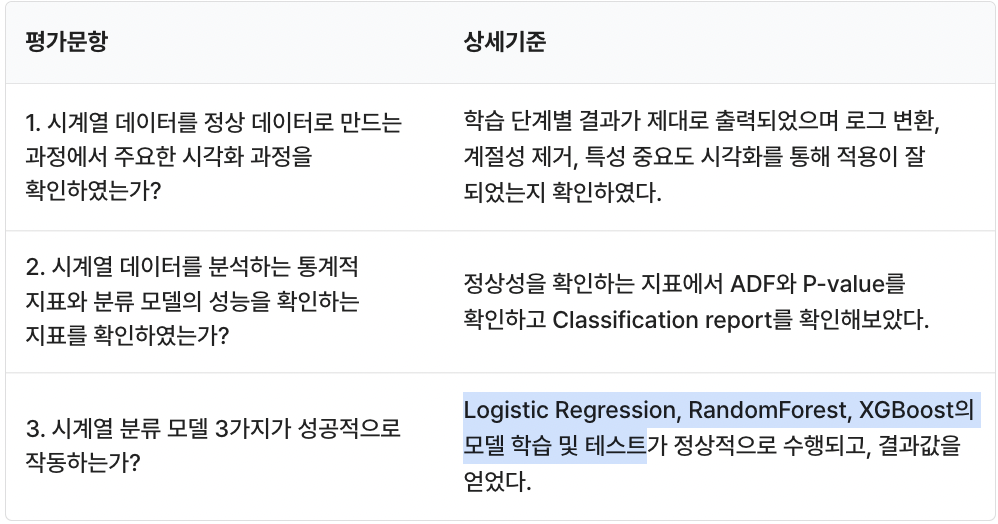

### Air Passengers per month  
https://www.kaggle.com/datasets/rakannimer/air-passengers

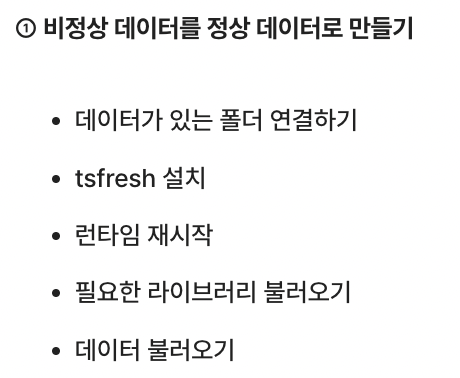

In [29]:
pwd

'/aiffel/aiffel/Interactive PYthon NoteBook/7th week'

In [30]:
!pwd

/aiffel/aiffel/Interactive PYthon NoteBook/7th week


In [46]:
cd ~

/aiffel


In [48]:
# 먼저 데이터가 저장된 폴더를 연결합시다.
!mkdir -p aiffel/time_series_basic
#!ln -s data/* aiffel/time_series_basic

!cp data/AirPassengers.csv aiffel/time_series_basic/

In [49]:
ls

aiffel/  data/


cp -> copy
.. -> 이전 폴더로

In [184]:
import tsfresh
tsfresh.__version__

'0.20.0'

In [4]:
!pip install tsfresh

### os.kill(pid, signal)
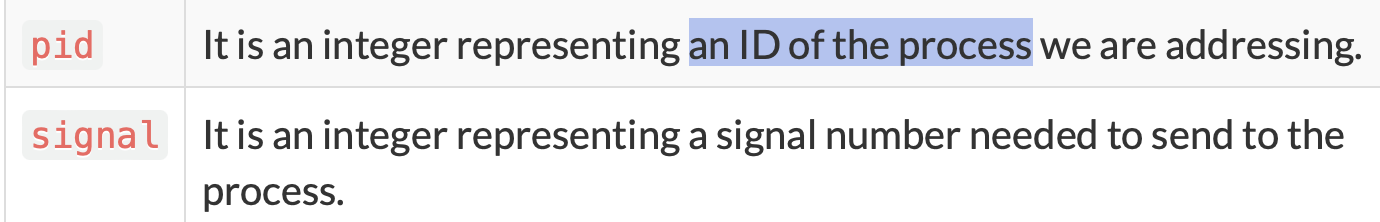

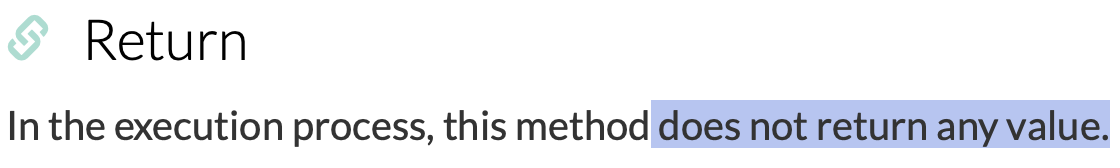
https://www.delftstack.com/api/python/python-os-kill-method/

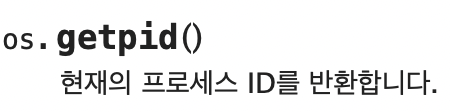
https://docs.python.org/ko/3.8/library/os.html

In [ ]:
# 라이브러리 버전 충돌을 피하기 위해 런타임을 재시작합니다.
import os
os.kill(os.getpid(), 9)
# Kill a process with a signal. -> Dead kernel

In [1]:
# 라이브러리 불러오기 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# air passengers 데이터 불러오기
import os

path = os.getenv("HOME")
airp = pd.read_csv(path +'/aiffel/time_series_basic/AirPassengers.csv')
airp

Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

In [27]:
airp.drop("Month", axis= 1, inplace= True)
airp

#Passengers
0            112
1            118
2            132
3            129
4            121
..           ...
139          606
140          508
141          461
142          390
143          432

[144 rows x 1 columns]

In [5]:
airp.info() #DataFrame, 144, int64, 1 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 1.2 KB


In [6]:
airp.describe()

#Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000

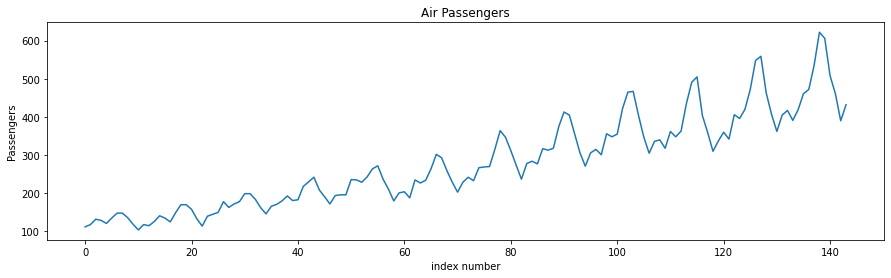

In [13]:
plt.figure(figsize= (15, 4))
plt.plot(airp)
plt.xlabel("index number")
plt.ylabel("Passengers")
plt.title("Air Passengers")
plt.show()

1. Non-stationary 비정상 그래프  
2. 분산을 줄이고  
3. 증가 trend 제거  
4. 정상 시계열 그래프로!  

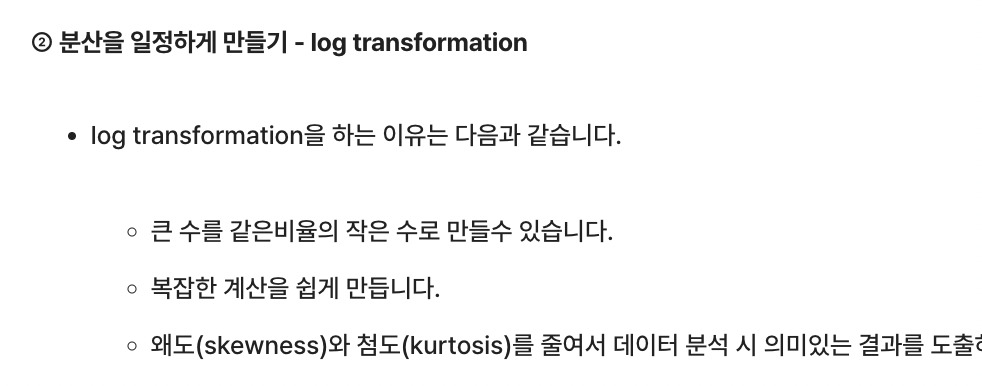

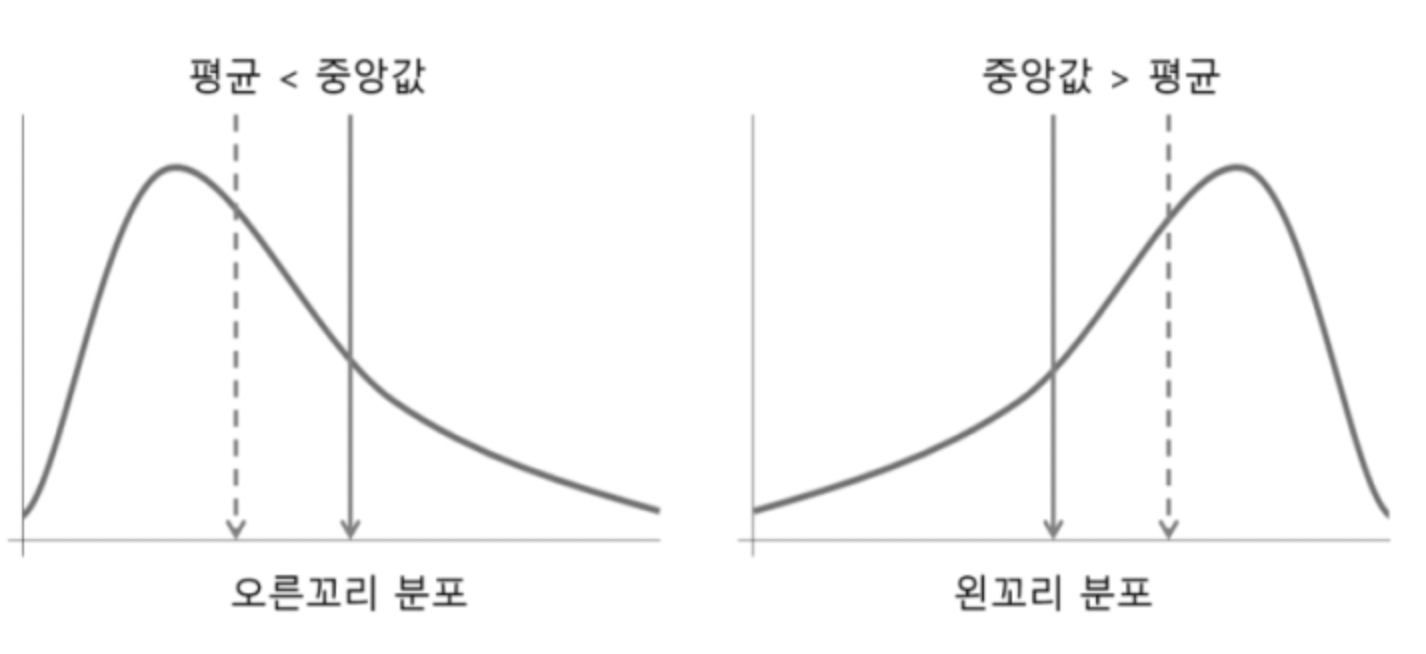

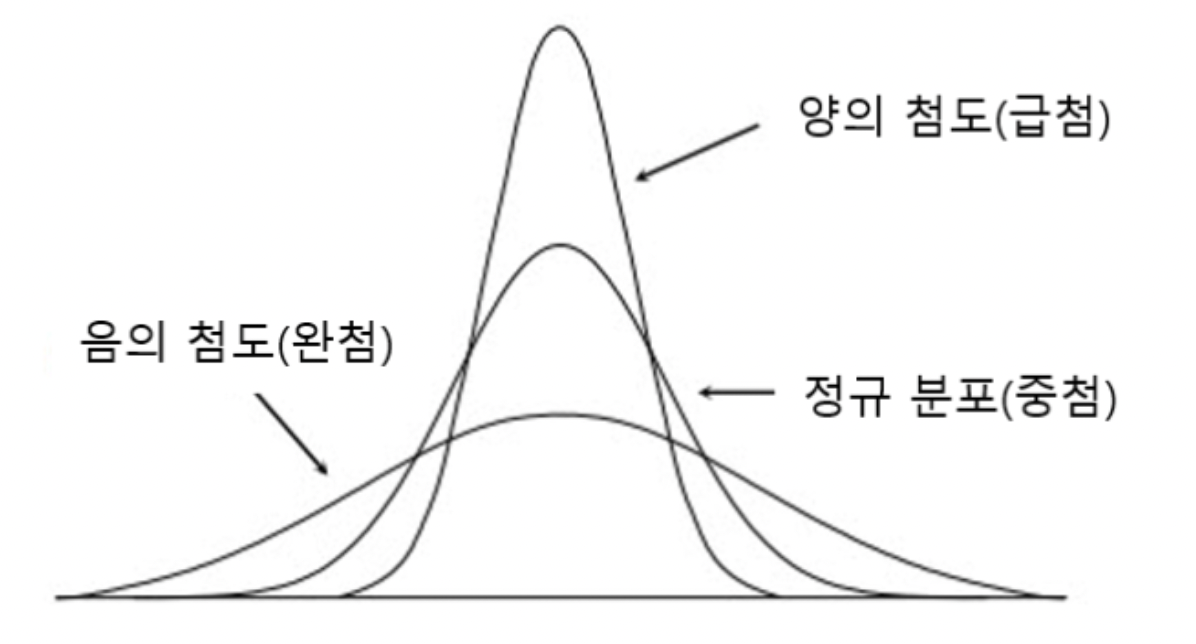

### numpy.log
(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])  
Natural logarithm, element-wise.  
https://numpy.org/doc/stable/reference/generated/numpy.log.html#numpy.log

In [28]:
log_airp = np.log(airp)
log_airp

#Passengers
0       4.718499
1       4.770685
2       4.882802
3       4.859812
4       4.795791
..           ...
139     6.406880
140     6.230481
141     6.133398
142     5.966147
143     6.068426

[144 rows x 1 columns]

In [70]:
log_airp.describe()

#Passengers
count   144.000000
mean      5.542176
std       0.441456
min       4.644391
25%       5.192957
50%       5.581599
75%       5.887489
max       6.432940

airp's mean -> 280.298611  
log_airp's mean -> 5.542176

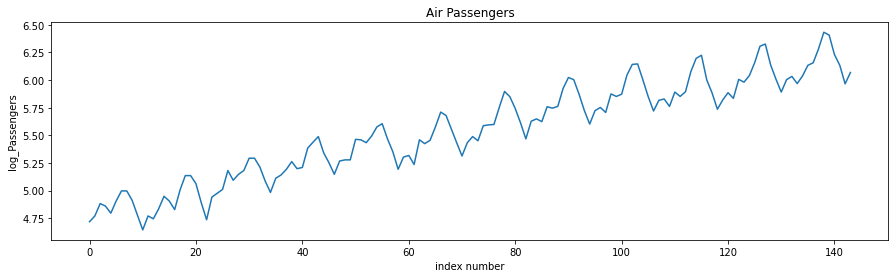

In [18]:
plt.figure(figsize= (15, 4))
plt.plot(log_airp)
plt.xlabel("index number")
plt.ylabel("log_Passengers")
plt.title("Air Passengers")
plt.show()

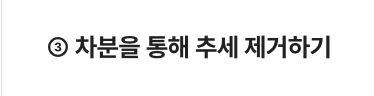

In [19]:
diff_airp = log_airp.diff()
diff_airp

#Passengers
0            NaN
1       0.052186
2       0.112117
3      -0.022990
4      -0.064022
..           ...
139    -0.026060
140    -0.176399
141    -0.097083
142    -0.167251
143     0.102279

[144 rows x 1 columns]

### DataFrame.diff(periods=1, axis=0)  
First discrete difference of element.  
Calculates the difference of a DataFrame element compared with another element in the DataFrame (default is element in previous row).  
discrete -> a.(같은 종류의 다른 것들과) 별개의 (=separate)  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html?highlight=diff#pandas.DataFrame.diff

In [25]:
diff_airp = log_airp.diff()[1:]
diff_airp

#Passengers
3      -0.022990
4      -0.064022
5       0.109484
6       0.091937
7       0.000000
..           ...
139    -0.026060
140    -0.176399
141    -0.097083
142    -0.167251
143     0.102279

[141 rows x 1 columns]

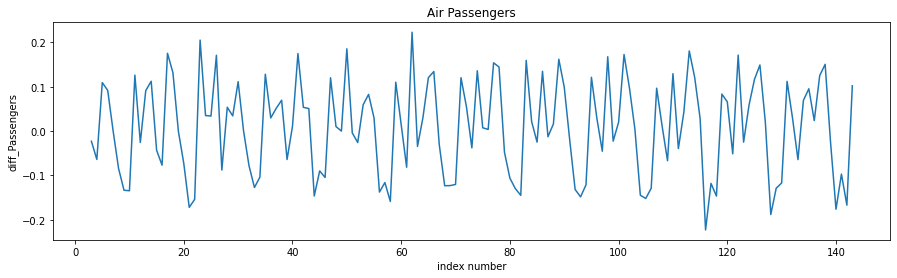

In [50]:
plt.figure(figsize= (15, 4))
plt.plot(diff_airp)
plt.xlabel("index number")
plt.ylabel("diff_Passengers")
plt.title("Air Passengers")
plt.show()

정상성을 가진 그래프로 보여지네요  
### stationay 조건
1. 무언가 반복되는 patteren
2. Trend 일정
3. 분산 일정
4. Seasonality 보이지 않음

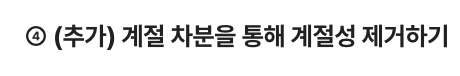

차분 -> 연이은 관측값들의 차이를 계산 -> 시계열의 평균 변화를 일정하게 만드는데 도움  
2차 차분 -> 가끔 차분을 해도 시계열의 정상성 만족되지 않을 경우 사용.  
계절성 차분 -> 관측치와 같은 계절의 이전 관측값과의 차이

difference in differences(差分の差分法)


In [51]:
sea_airp = diff_airp.diff(12) #주기를 12 
sea_airp

#Passengers
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
..           ...
139    -0.045934
140     0.012024
141     0.031830
142    -0.050082
143    -0.009964

[141 rows x 1 columns]

In [52]:
sea_airp.info()
#141, 129 non-null, float64, 1 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 3 to 143
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #Passengers  129 non-null    float64
dtypes: float64(1)
memory usage: 1.2 KB


In [55]:
sea_airp.isnull().sum()

#Passengers    12
dtype: int64

In [56]:
sea_airp.dropna(inplace= True)
sea_airp

#Passengers
15     -0.020496
16     -0.012939
17      0.066148
18      0.039915
19      0.000000
..           ...
139    -0.045934
140     0.012024
141     0.031830
142    -0.050082
143    -0.009964

[129 rows x 1 columns]

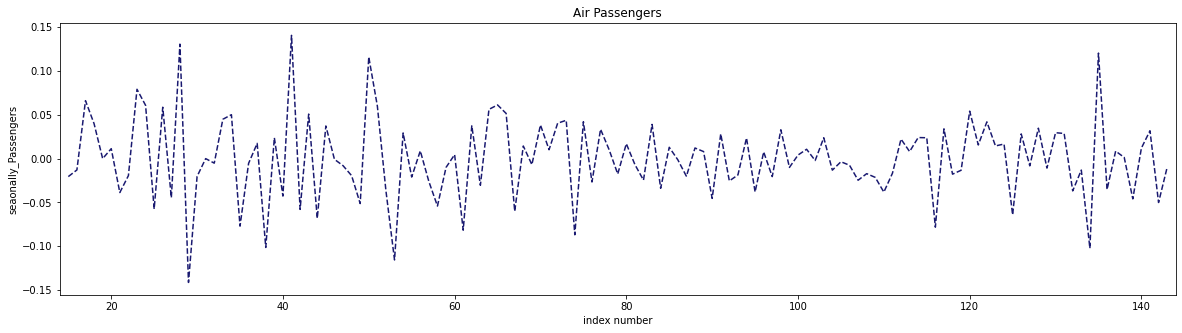

In [81]:
plt.figure(figsize= (20, 5))
plt.plot(sea_airp, color= "midnightblue", linestyle= "--")

plt.xlim(14,144)
plt.xlabel("index number")
plt.ylabel("seaonally_Passengers")
plt.title("Air Passengers")
# plt.legend(fancybox= True)
plt.show()

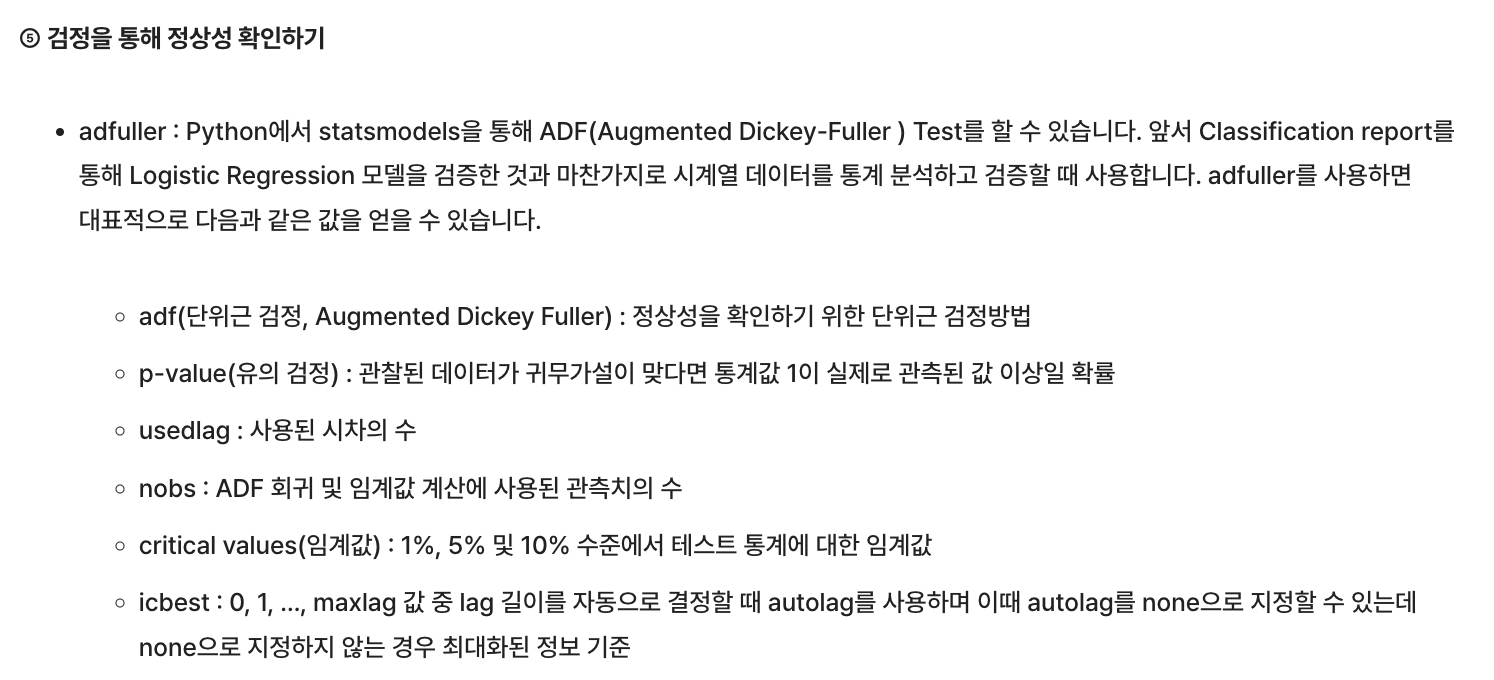

### statsmodels.tsa.stattools.adfuller  
(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)  
#### Augmented Dickey-Fuller unit root test  
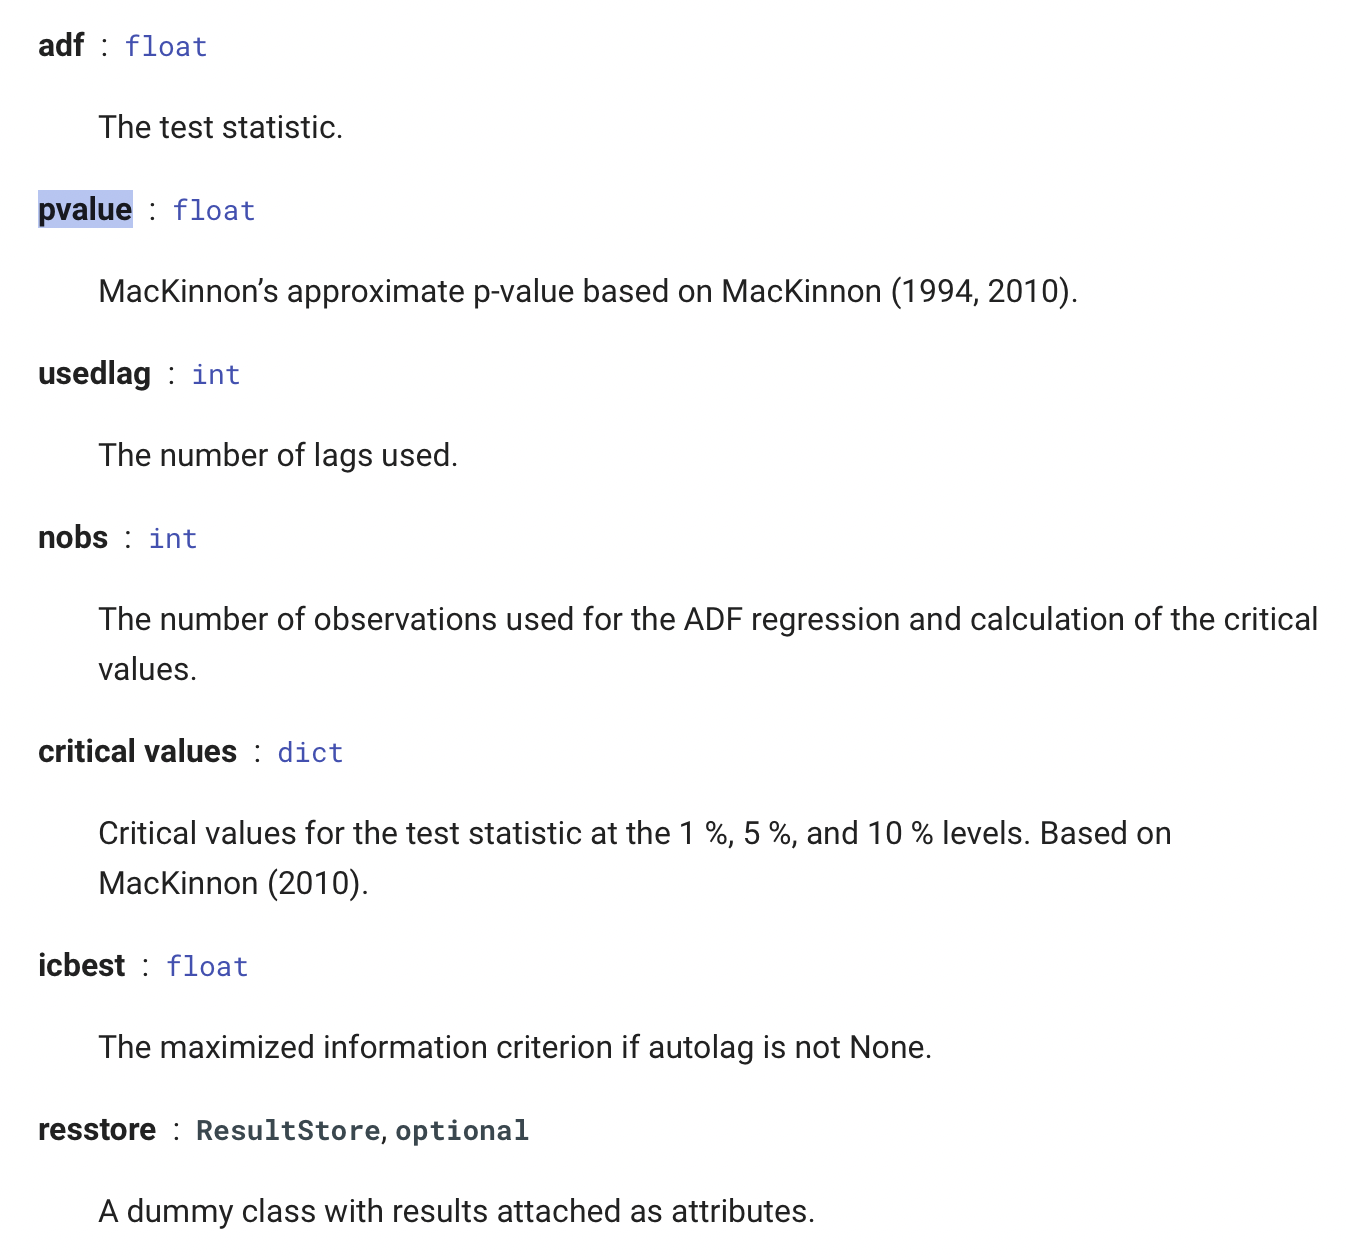
https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [86]:
from statsmodels.tsa.stattools import adfuller as ad

In [87]:
ad(sea_airp)

(-4.266806767816743,
 0.0005068253167924122,
 11,
 117,
 {'1%': -3.487517288664615,
  '5%': -2.8865777180380032,
  '10%': -2.5801239192052012},
 -416.80787233097976)

adf 검정 통계량  
p-value  
usedlag 사용된 시차의 수  
nobs 분석에 자료의 수  
critical values 1%, 5%, 10% 수준에 해당되는 검정 통계량의 값  
icbest
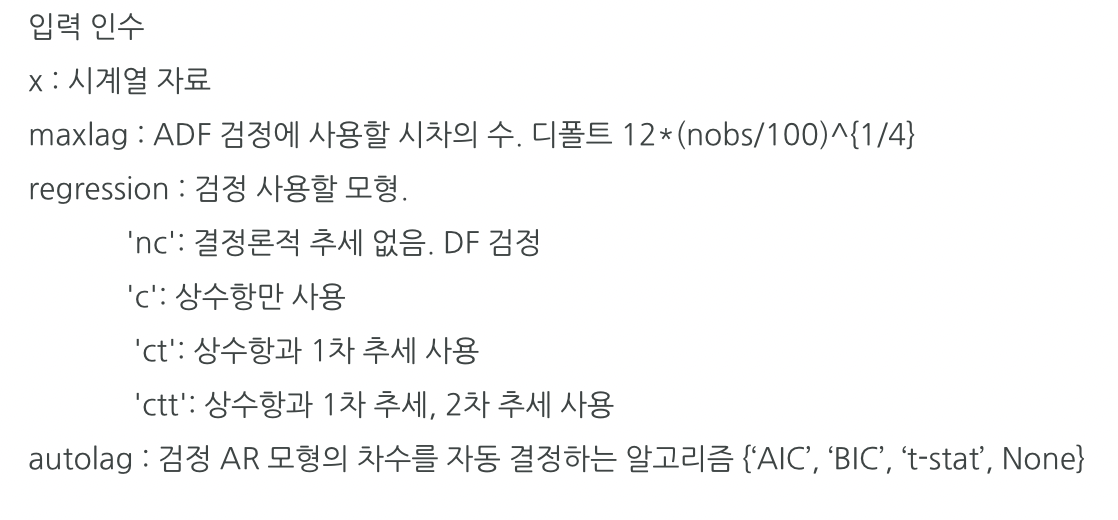

In [90]:
def adf_test(x): # adf검정을 위한 함수 정의
    stat, p_value, lags, nobs, crit, icb = adfuller(x) # adfuller 함수를 이용하면 6가지 output이 나옵니다
    print('ADF statistics:', stat) # ADF 검정 통계량입니다
    print('P-value:', p_value) # P-value입니다
    print('lags:', lags) 
    print('nobs:', nobs) 
    print('crit:', crit) 
    print('icb:', icb)     

In [91]:
adf_test(sea_airp) 
# 계절차분까지 수행한 데이터에 대해 adf테스트를 수행

ADF statistics: -4.266806767816743
P-value: 0.0005068253167924122
lags: 11
nobs: 117
crit: {'1%': -3.487517288664615, '5%': -2.8865777180380032, '10%': -2.5801239192052012}
icb: -416.80787233097976


In [203]:
sea_airp.shape, y_test.shape, time_series.shape

((129, 1), (21,), (1320, 8))

유의수준 0.01에서 단위근이 존재한다라는 귀무가설을 기각하고  
시계열은 정상적이다라는 대립가설을 채택

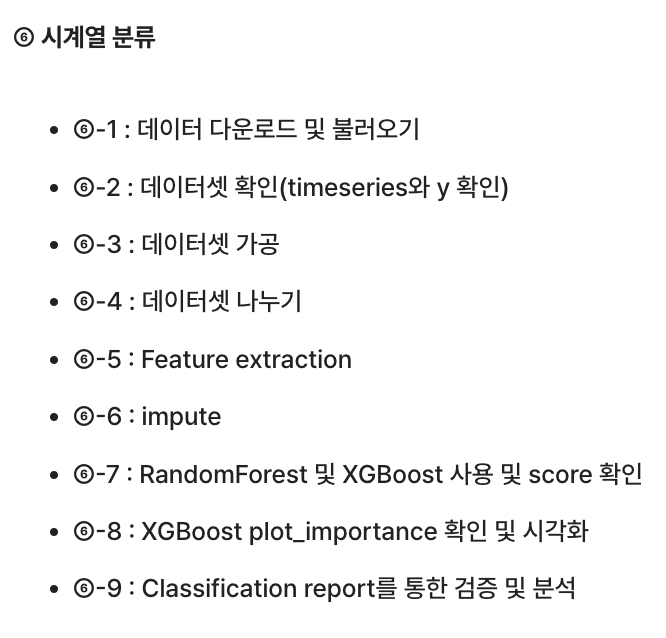

This module implements functions to download the Robot Execution Failures LP1 Data Set[1] and load it as as DataFrame.  
https://tsfresh.readthedocs.io/en/v0.3.0/api/tsfresh.examples.html

In [100]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

### download_robot_execution_failures  
(
    file_name='/opt/conda/lib/python3.9/site-packages/tsfresh/examples/data/robotfailure-mld/lp1.data',
)

In [101]:
download_robot_execution_failures()

### load_robot_execution_failures  
(
    multiclass=False,
    file_name='/opt/conda/lib/python3.9/site-packages/tsfresh/examples/data/robotfailure-mld/lp1.data',
)

In [102]:
load_robot_execution_failures()

(      id  time  F_x  F_y  F_z  T_x  T_y  T_z
 0      1     0   -1   -1   63   -3   -1    0
 1      1     1    0    0   62   -3   -1    0
 2      1     2   -1   -1   61   -3    0    0
 3      1     3   -1   -1   63   -2   -1    0
 4      1     4   -1   -1   63   -3   -1    0
 ...   ..   ...  ...  ...  ...  ...  ...  ...
 1315  88    10  -10    2   39  -21  -24    5
 1316  88    11  -11    2   38  -24  -22    6
 1317  88    12  -12    3   23  -24  -24    5
 1318  88    13  -13    4   26  -29  -27    5
 1319  88    14  -13    2   15  -25  -25    6
 
 [1320 rows x 8 columns],
 1      True
 2      True
 3      True
 4      True
 5      True
       ...  
 84    False
 85    False
 86    False
 87    False
 88    False
 Length: 88, dtype: bool)

In [103]:
time_series, y = load_robot_execution_failures()

In [106]:
time_series.info()
#1320, int64, 8 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      1320 non-null   int64
 1   time    1320 non-null   int64
 2   F_x     1320 non-null   int64
 3   F_y     1320 non-null   int64
 4   F_z     1320 non-null   int64
 5   T_x     1320 non-null   int64
 6   T_y     1320 non-null   int64
 7   T_z     1320 non-null   int64
dtypes: int64(8)
memory usage: 82.6 KB


In [113]:
time_series.describe()

id         time          F_x          F_y          F_z  \
count  1320.000000  1320.000000  1320.000000  1320.000000  1320.000000   
mean     44.500000     7.000000    -2.345455     8.913636  -128.214394   
std      25.411399     4.322131    50.367960    45.845475   346.816091   
min       1.000000     0.000000  -260.000000  -353.000000 -1547.000000   
25%      22.750000     3.000000    -4.000000    -2.000000  -117.250000   
50%      44.500000     7.000000    -1.000000     1.000000    46.000000   
75%      66.250000    11.000000     3.000000    11.000000    60.000000   
max      88.000000    14.000000   342.000000   236.000000   157.000000   

               T_x          T_y          T_z  
count  1320.000000  1320.000000  1320.000000  
mean    -39.028030    -4.517424     0.868182  
std     147.269399   101.609308    18.317250  
min    -672.000000  -646.000000  -137.000000  
25%     -39.250000   -13.000000    -1.000000  
50%      -9.000000    -3.000000     0.000000  
75%      -1.000000     3.000000     2.000000  
max     686.000000   601.000000   123.000000

In [109]:
y.describe()

count        88
unique        2
top       False
freq         67
dtype: object

In [111]:
y.isnull().sum()

0

In [112]:
y.unique()

array([ True, False])

~ -> not

In [199]:
# ⑥-3 : 데이터셋 가공
def custom_classification_split(x,y,test_size=0.3): # 수업때 보았던 custom split 함수
    
    num_true = int(y.sum() * test_size)
    #int(21 * 0.25)
    
    print(num_true, ":num_true")
    print("오..존잘 상준님")
    print(test_size, ":test_size")
    print("오..우유빛깔 상준님") 
    print(y.sum(), ":y_sum")
    print("오..멋찌다 상준님") 
    
    num_false = int((len(y) - y.sum()) * test_size)
    #int((88 - 21) * 0.25)
    
    print(num_false, ":num_false")
    print("오..후광작렬 상준님") 
    print(len(y), ":y_len")
    print("오..상준님")
    
    id_list = y[y== False].head(num_false).index.to_list() + y[y== True].head(num_true).index.to_list()
    
    print(id_list, ":id_list")
    print("오..상준님 최고")
    print(y[y== False].head(num_false), "y_false")
    print(y[y== False].head(16).index, "y_false_index")    
    print("오..상준님께 저작권 동의 받음")
    print(y[y== True].head(num_true), "y_true")
    print(y[y== True].head(5).index, "y_true_index")
    print("오..상준님 최고")
    
    y_train = y.drop(id_list)
    y_test = y.iloc[id_list].sort_index()
    X_train = time_series[~time_series['id'].isin(id_list)]
    X_test = time_series[time_series['id'].isin(id_list)]
    
    
    return X_train, y_train, X_test, y_test

In [200]:
# ⑥-4 : 데이터셋 나누기
X_train, y_train, X_test, y_test = custom_classification_split(time_series, 
                                                               y, 
                                                               test_size = 0.25)

5 :num_true
오..존잘 상준님
0.25 :test_size
오..우유빛깔 상준님
21 :y_sum
오..멋찌다 상준님
16 :num_false
오..후광작렬 상준님
88 :y_len
오..상준님
[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 1, 2, 3, 4, 5] :id_list
오..상준님 최고
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool y_false
Int64Index([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], dtype='int64') y_false_index
오..상준님께 저작권 동의 받음
1    True
2    True
3    True
4    True
5    True
dtype: bool y_true
Int64Index([1, 2, 3, 4, 5], dtype='int64') y_true_index
오..상준님 최고


In [117]:
X_train, y_train, X_test, y_test

(      id  time  F_x  F_y  F_z  T_x  T_y  T_z
 75     6     0   -1    2   57  -10   -3    0
 76     6     1   -2    3   60  -12   -4   -1
 77     6     2   -1    2   63  -12   -6    1
 78     6     3    1    3   62  -11    0    0
 79     6     4   -3    2   56   -9   -4    0
 ...   ..   ...  ...  ...  ...  ...  ...  ...
 1315  88    10  -10    2   39  -21  -24    5
 1316  88    11  -11    2   38  -24  -22    6
 1317  88    12  -12    3   23  -24  -24    5
 1318  88    13  -13    4   26  -29  -27    5
 1319  88    14  -13    2   15  -25  -25    6
 
 [1005 rows x 8 columns],
 6      True
 7      True
 8      True
 9      True
 10     True
       ...  
 84    False
 85    False
 86    False
 87    False
 88    False
 Length: 67, dtype: bool,
      id  time  F_x  F_y  F_z  T_x  T_y  T_z
 0     1     0   -1   -1   63   -3   -1    0
 1     1     1    0    0   62   -3   -1    0
 2     1     2   -1   -1   61   -3    0    0
 3     1     3   -1   -1   63   -2   -1    0
 4     1     4   -1   -1  

In [118]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# 3 : 1 학습

((1005, 8), (67,), (315, 8), (21,))

In [120]:
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute

https://tsfresh.readthedocs.io/en/latest/api/tsfresh.feature_extraction.html?highlight=EfficientFCParameters

### extract_features  
(
    timeseries_container,
    default_fc_parameters=None,
    kind_to_fc_parameters=None,
    column_id=None,
    column_sort=None,
    column_kind=None,
    column_value=None,
    chunksize=None,
    n_jobs=1,
    show_warnings=False,
    disable_progressbar=False,
    impute_function=None,
    profile=False,
    profiling_filename='profile.txt',
    profiling_sorting='cumulative',
    distributor=None,
    pivot=True,
)

### EfficientFCParameters()
   
This class is a child class of the ComprehensiveFCParameters class
and has the same functionality as its base class.

In [125]:
impute?

In [126]:
settings = EfficientFCParameters()

In [127]:
# ⑥-5 : Feature extraction
comprehensive_features_train = extract_features(
                                    X_train, 
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|██████████| 402/402 [00:15<00:00, 25.70it/s]


In [128]:
comprehensive_features_test = extract_features(
                                    X_test, 
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|██████████| 126/126 [00:04<00:00, 27.60it/s]


In [129]:
# ⑥-6 : impute
impute(comprehensive_features_train)

/opt/conda/lib/python3.9/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


F_x__variance_larger_than_standard_deviation  F_x__has_duplicate_max  \
6                                            1.0                     1.0   
7                                            0.0                     1.0   
8                                            1.0                     0.0   
9                                            1.0                     0.0   
10                                           0.0                     0.0   
..                                           ...                     ...   
84                                           1.0                     1.0   
85                                           1.0                     0.0   
86                                           1.0                     0.0   
87                                           1.0                     1.0   
88                                           1.0                     0.0   

    F_x__has_duplicate_min  F_x__has_duplicate  F_x__sum_values  \
6                      1.0                 1.0            -15.0   
7                      0.0                 1.0            -13.0   
8                      1.0                 1.0            -10.0   
9                      0.0                 1.0            -10.0   
10                     1.0                 1.0            -14.0   
..                     ...                 ...              ...   
84                     0.0                 1.0          -1073.0   
85                     1.0                 1.0            143.0   
86                     0.0                 0.0            961.0   
87                     0.0                 1.0           4509.0   
88                     1.0                 1.0           -143.0   

    F_x__abs_energy  F_x__mean_abs_change  F_x__mean_change  \
6              39.0              1.714286          0.142857   
7              21.0              0.928571          0.214286   
8              26.0              1.142857         -0.142857   
9              24.0              1.428571          0.000000   
10             14.0              0.142857          0.000000   
..              ...                   ...               ...   
84          96833.0              7.142857         -5.428571   
85           1683.0              1.357143          1.071429   
86          83497.0              9.071429          9.071429   
87        1405437.0             12.928571         12.214286   
88           1427.0              0.785714         -0.500000   

    F_x__mean_second_derivative_central  F_x__median  ...  \
6                              0.153846         -1.0  ...   
7                             -0.076923         -1.0  ...   
8                              0.192308         -1.0  ...   
9                             -0.076923         -1.0  ...   
10                             0.000000         -1.0  ...   
..                                  ...          ...  ...   
84                            -0.038462        -98.0  ...   
85                             0.076923          8.0  ...   
86                             0.807692         52.0  ...   
87                            -1.038462        338.0  ...   
88                             0.038462         -9.0  ...   

    T_z__fourier_entropy__bins_5  T_z__fourier_entropy__bins_10  \
6                       0.974315                       1.213008   
7                       1.255482                       1.494175   
8                       1.494175                       1.732868   
9                       1.255482                       1.494175   
10                      0.937285                       1.213008   
..                           ...                            ...   
84                      0.735622                       0.735622   
85                      0.735622                       0.735622   
86                      0.735622                       1.073543   
87                      0.735622                       0.735622   
88                      1.255482                       1.49

In [130]:
impute(comprehensive_features_test)

/opt/conda/lib/python3.9/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


F_x__variance_larger_than_standard_deviation  F_x__has_duplicate_max  \
1                                            0.0                     0.0   
2                                            0.0                     1.0   
3                                            0.0                     0.0   
4                                            0.0                     1.0   
5                                            0.0                     0.0   
19                                           1.0                     0.0   
20                                           1.0                     0.0   
21                                           1.0                     0.0   
22                                           1.0                     0.0   
23                                           1.0                     0.0   
24                                           1.0                     0.0   
25                                           1.0                     0.0   
26                                           1.0                     0.0   
27                                           1.0                     1.0   
28                                           1.0                     0.0   
29                                           1.0                     0.0   
30                                           1.0                     0.0   
31                                           1.0                     0.0   
32                                           1.0                     0.0   
33                                           1.0                     0.0   
34                                           1.0                     0.0   

    F_x__has_duplicate_min  F_x__has_duplicate  F_x__sum_values  \
1                      1.0                 1.0            -14.0   
2                      1.0                 1.0            -13.0   
3                      1.0                 1.0            -10.0   
4                      1.0                 1.0             -6.0   
5                      0.0                 1.0             -9.0   
19                     0.0                 1.0             99.0   
20                     1.0                 1.0            155.0   
21                     0.0                 1.0           -171.0   
22                     0.0                 1.0            102.0   
23                     0.0                 1.0             67.0   
24                     0.0                 1.0           -338.0   
25                     0.0                 1.0           -123.0   
26                     0.0                 1.0            -63.0   
27                     0.0                 1.0             50.0   
28                     0.0                 1.0            -28.0   
29                     0.0                 1.0            -51.0   
30                     1.0                 1.0             36.0   
31                     0.0                 1.0             43.0   
32                     0.0                 1.0            -15.0   
33                     0.0                 1.0             22.0   
34                     0.0                 1.0            173.0   

    F_x__abs_energy  F_x__mean_abs_change  F_x__mean_change  \
1              14.0              0.142857          0.000000   
2              25.0              1.000000          0.000000   
3              12.0              0.714286          0.000000   
4              16.0              1.214286         -0.071429   
5              17.0              0.928571         -0.071429   
19           6109.0             13.928571         -1.928571   
20          34455.0             16.714286        -13.142857   
21          16495.0             20.928571          1.785714   
22          12700.0             10.785714         -8.071429   
23          10593.0             15.142857         -7.000000   
24          37100.0             13.214286          9.071429   
25           6853.0              7.785714          5.214286   
26          18717.0             14.21

### ⑥-7 : RandomForest 사용 및 score 확인

In [131]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 3)

rf_clf.fit(comprehensive_features_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [132]:
rf_clf.score(comprehensive_features_test, y_test) 
# test셋에 적합해본 결과 약 0.66의 정확도를 보이며 불만족스러운 결과를 확인할 수 있습니다.

0.8571428571428571

### ⑥-7 : XGBoost 사용 및 score 확인

In [133]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 3)

xgb_clf.fit(comprehensive_features_train, y_train)

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:23:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [134]:
xgb_clf.score(comprehensive_features_test, y_test)

1.0

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [164]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state= 50)

In [165]:
lr.fit(comprehensive_features_train, y_train)

LogisticRegression(random_state=50)

In [166]:
lr.score(comprehensive_features_test, y_test)

0.5714285714285714

<Figure size 1440x144 with 0 Axes>

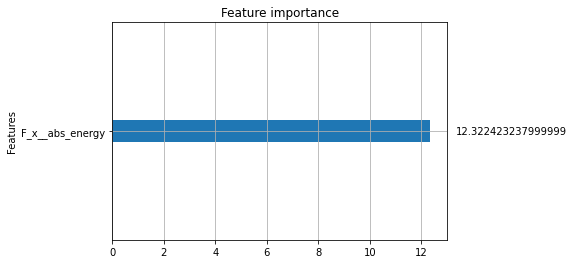

In [201]:
# ⑥-8 : XGBoost plot_importance 확인 및 시각화
plt.figure(figsize= (20, 2))

xgb.plot_importance(xgb_clf, importance_type = 'gain') 
# plot_importance를 통해 어떤 변수(특징)가 가장 유의미한지 확인
plt.xlim(0, 13)
plt.xlabel("")
plt.ylabel("Features")
plt.title("Feature importance")
plt.show();

In [147]:
comprehensive_features_train.info()
#67, Columns: 4662,  float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 6 to 88
Columns: 4662 entries, F_x__variance_larger_than_standard_deviation to T_z__mean_n_absolute_max__number_of_maxima_7
dtypes: float64(4662)
memory usage: 2.4 MB


In [155]:
comprehensive_features_train["F_x__abs_energy"].describe()

count    6.700000e+01
mean     4.769230e+04
std      2.046168e+05
min      6.000000e+00
25%      8.900000e+01
50%      1.518000e+03
75%      9.379000e+03
max      1.405437e+06
Name: F_x__abs_energy, dtype: float64

In [149]:
comprehensive_features_test.info()
# 21, Columns: 4662, float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 34
Columns: 4662 entries, F_x__variance_larger_than_standard_deviation to T_z__mean_n_absolute_max__number_of_maxima_7
dtypes: float64(4662)
memory usage: 765.0 KB


In [156]:
comprehensive_features_test["F_x__abs_energy"].describe()

count       21.000000
mean      7528.095238
std      11078.933622
min         12.000000
25%        199.000000
50%       1100.000000
75%      10593.000000
max      37100.000000
Name: F_x__abs_energy, dtype: float64

In [162]:
sum(xgb_clf.feature_importances_ != 0) 
# Fx값의 abs_energy특징만의 유의미함

1

결국 고장 유무를 판별하는 기준은 F_X_abs_energy라는 특징 하나

In [163]:
# ⑥-9 : Classification report를 통한 검증 및 분석
from sklearn.metrics import classification_report

classification_report(y_test, 
                      xgb_clf.predict(comprehensive_features_test), 
                      target_names = ['true', 'false'], 
                      output_dict = True)

{'true': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16},
 'false': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21}}

# 회고

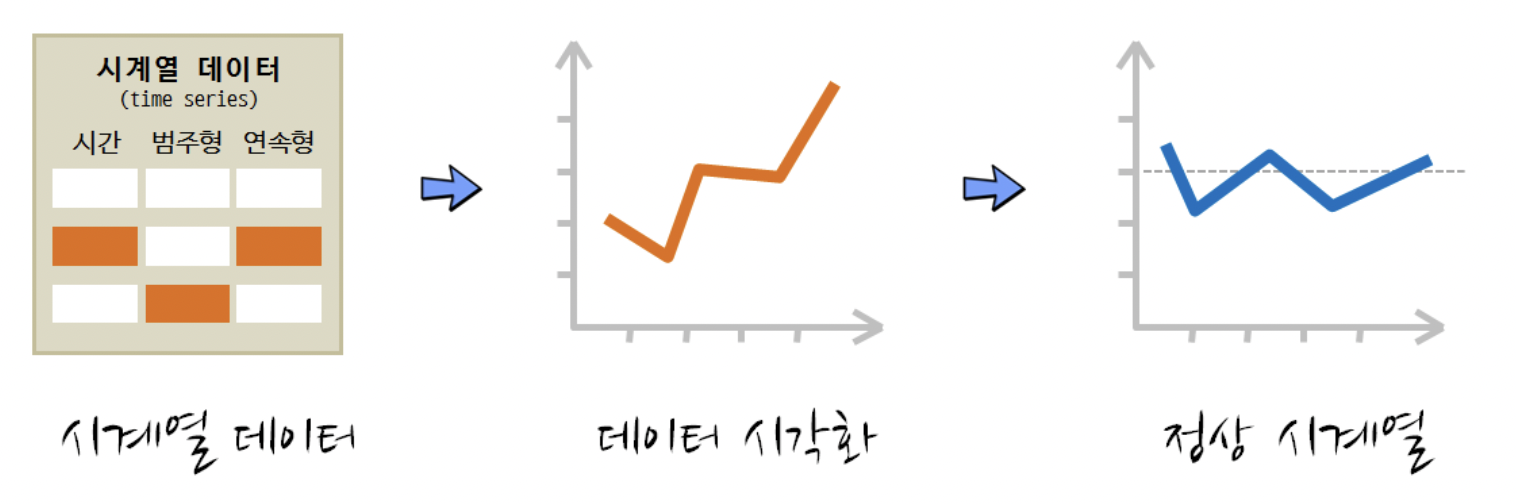
http://aispiration.com/statistics/stat-time-series-eda.html

1. 데이터를 가져오고
2. 데이터를 시각화시키고
3. stationary 형태가 아니라면 diff or log 함수 사용
4. 다시 시각화
5. 훈련용 테스트용으로 분리
6. 모델 학습시키기
7. 검증 및 분석 하기
이런 식으로 전체적인 흐름을 배우는 시간이였습니다.  

def custom_classification_split()  
def로 함수를 만들지 않고 기존 모듈?패키지가 없을까 고민에 고민만 했네요..

시계열과 관련 이론만 배우고  
금일, 실습과 동시에 프로젝트이여서 막막했지만  
아이펠에서 보낸 시간 덕분에 
이러한 문제를 마주쳤을 때, 해당 문제를 돌파해보는 실습을 했었던 다소 뜻 깊은 시간이였음을 느꼈던 그런 소중한 시간이였습니다.  
오늘은 나아가야할 길을 기어서 갔지만 내일은 아니 그 다음 번에는 걸어가길 바라며 포기하지 않았던 프로젝트였습니다.

P.S "스마일~" 해보는 시간이어요.